<a href="https://colab.research.google.com/github/TedFess/DSPS_tFessaras/blob/master/HW2/DSPS_tFessaras_HW2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
 
 Partners:
 Dylan Hilligoss, Nickolas Hart, Catherine Harty, Theodore Fessaras

*   List item
*   List item


UDel DSPS 2019

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [0]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [0]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [0]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [0]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

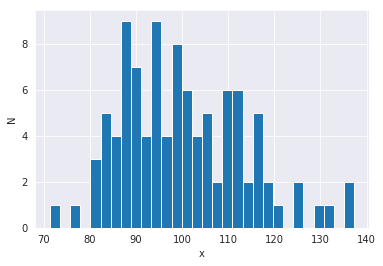

In [0]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
md = {}
# md is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['chisq'] = np.random.chisquare(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom. 

## let numpy calculate what the mean and stdev of this distribution are

In [0]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we will discuss in class)

In [0]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

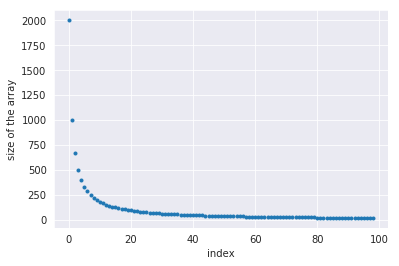

In [0]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.3999999999999, 100, 'expected mean')

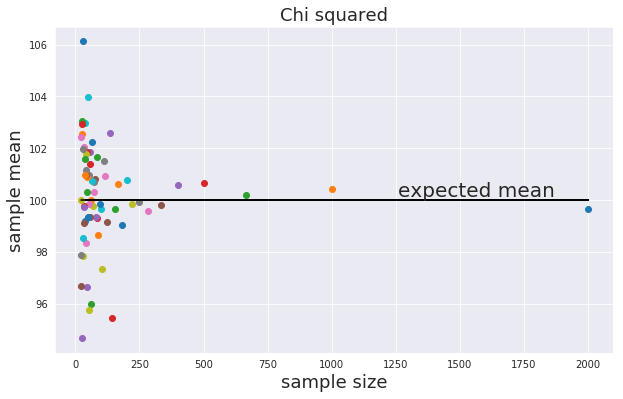

In [0]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 2: Plot of 100 Chi-squared samples. According to the law of large numbers, as more and more samples are generated, we can see that the greatest frequency of means are closer to the expected mean.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0, 0.5, 'N')

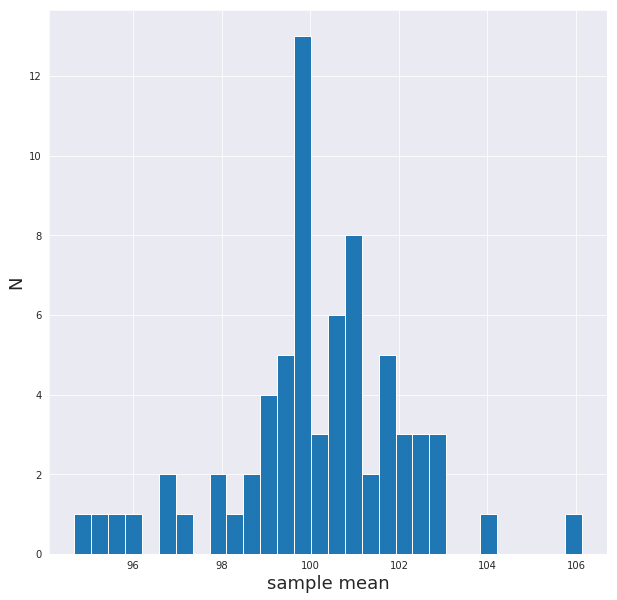

In [0]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: In this histogram plot of the Chi-Squared distribution, it is more obvious that the actual mean is closer to the expected mean for the Chi-Squared distribution. 

# Do it for the Normal distribution


Text(1259.3999999999999, 100, 'expected mean')

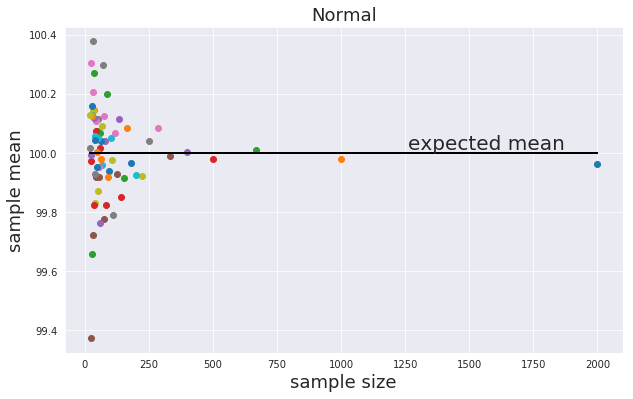

In [0]:
# Normal distribution samples plot generation

md['norm'] = {} 



for n in mysize:
    md['norm'][n] = np.random.normal(mymean, size = n)
    
# save the means for plotting later    

md['norm']['means'] = {}
norm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        #and plot it
        norm_mu_n.plot(nn, md['norm']['means'][nn], 'o')
        norm_mu_n.set_xlabel('sample size', fontsize=18)
        norm_mu_n.set_ylabel('sample mean', fontsize=18)
        norm_mu_n.set_title('Normal', fontsize=18)
        norm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
norm_mu_n.text(norm_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)



Figure 4: Plot of 100 normal distribution samples, sample mean at 100. This plot is more well-behaved as it is the plot of a normal distribution and is in agreement with the law of large numbers.

Text(0, 0.5, 'N')

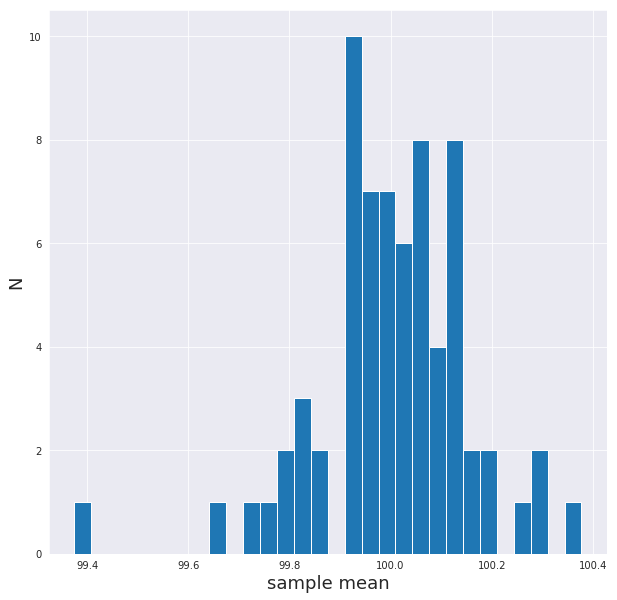

In [0]:
allmeans = list(md['norm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 5: Supporting the conclusion in figure 4, this histogram of the normal distribution samples upholds the law of large numbers as the greatest mean frequency is centered around the expected mean of 100.

# Do it for the Poisson distribution

Text(1259.3999999999999, 100, 'expected mean')

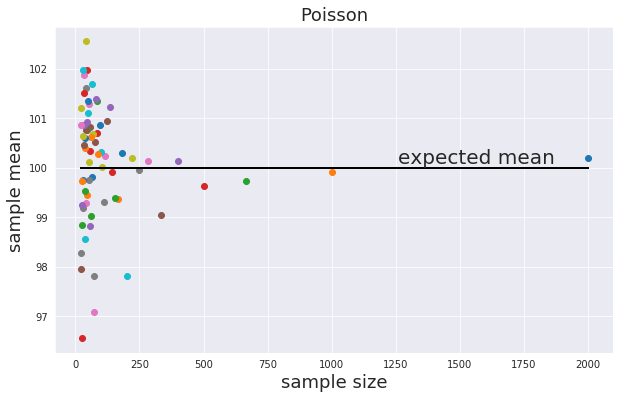

In [0]:
# Plot of Poisson distribution samples

md['pois'] = {} 


for n in mysize:
    md['pois'][n] = np.random.poisson(mymean, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
pois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        pois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        pois_mu_n.set_xlabel('sample size', fontsize=18)
        pois_mu_n.set_ylabel('sample mean', fontsize=18)
        pois_mu_n.set_title('Poisson', fontsize=18)
        pois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
pois_mu_n.text(pois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)



Figure 6: In this plot we see the Poisson distribution, again in agreement with the law of large numbers. In additon, this plot also supports the central limit theorem which states that even if the variables themselves are not normally distributed, their properly normalized sum tends to look more like a normal distribution.

Text(0, 0.5, 'N')

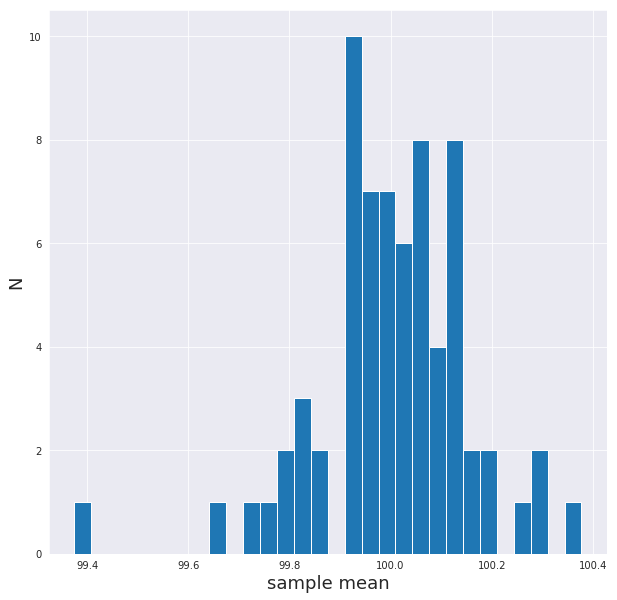

In [0]:
allmeans = list(md['norm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 6: Supports figure 5's explanation. Mean is centered around 100 with possible outlier at 99.4. Supports CLT and Law of Large numbers.

# Do it for the Binomial distribution

Text(1259.3999999999999, 100, 'expected mean')

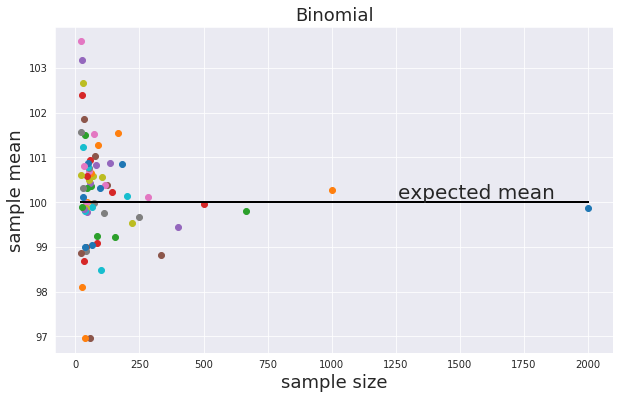

In [0]:
# Plot of Binomial Distribution samples

md['bin'] = {} 


for n in mysize:
    md['bin'][n] = np.random.binomial(2 * mymean, 0.5 ,size = n)
    
# save the means for plotting later    

md['bin']['means'] = {}
bin_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['bin']:
    if not type(nn) == str:
        md['bin']['means'][nn] = md['bin'][nn].mean()
        #and plot it
        bin_mu_n.plot(nn, md['bin']['means'][nn], 'o')
        bin_mu_n.set_xlabel('sample size', fontsize=18)
        bin_mu_n.set_ylabel('sample mean', fontsize=18)
        bin_mu_n.set_title('Binomial', fontsize=18)
        bin_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
bin_mu_n.text(pois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)


Figure 7: Plot of binomial distribution samples. Shape of plot appears to follow that of a bell-curve which is in agreement with the Central Limit Theorem. 

Text(0, 0.5, 'N')

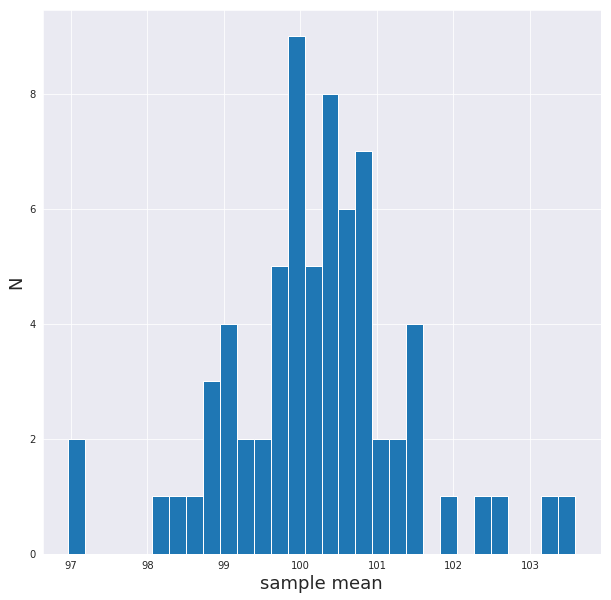

In [0]:
allmeans = list(md['bin']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 8: Increased densiy in center around the expected mean is in agreement with the law of large numbers. 

# Do it for another distribution

Text(1259.3999999999999, 100, 'expected mean')

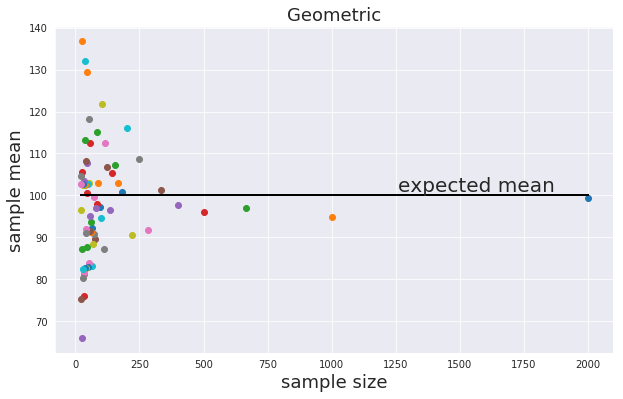

In [0]:
# Plot of geometric distribution samples

md['geo'] = {} 


for n in mysize:
    md['geo'][n] = np.random.geometric(.01,size = n)
    
# save the means for plotting later    

md['geo']['means'] = {}
geo_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['geo']:
    if not type(nn) == str:
        md['geo']['means'][nn] = md['geo'][nn].mean()
        #and plot it
        geo_mu_n.plot(nn, md['geo']['means'][nn], 'o')
        geo_mu_n.set_xlabel('sample size', fontsize=18)
        geo_mu_n.set_ylabel('sample mean', fontsize=18)
        geo_mu_n.set_title('Geometric', fontsize=18)
        geo_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
geo_mu_n.text(pois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)


Figure 9: Plot of geometric distribution samples, the distributions with the largest sample size are closer to the expected mean in agreement with the law of large numbers.

Figure 10: Histogram of geometric distribution samples, highest frequency is near 100 which is the expected mean.

Text(0, 0.5, 'N')

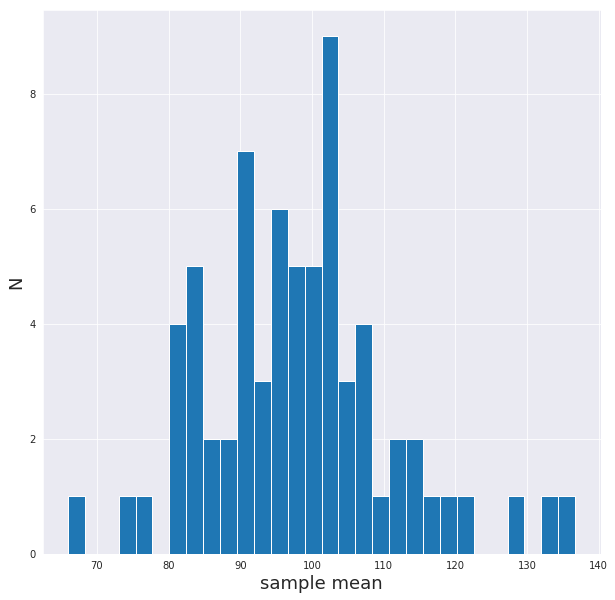

In [0]:
allmeans = list(md['geo']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

**Conclusion:**
In conclusion, after generating all of these distributions and seeing their plots. All of the plots were in agreement with the Central Limit Theorem and the Law of Large numbers. Despite the distributions all being different, we can see that as the sample sizes were increased over time, they tended to fall closer to the expected mean of 100 as compared to the other samples with a smaller size. Additionally, while they weren't all normal distributions, they tended to look more like them in their histograms as explained by the Central Limit Theorem. 

# 667 students: fita  a Gaussian to the histogram of the means for each distribution

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram. 

In [0]:
pl.hist(allmeans,bins=30)

And you can create your own Gaussian function to pass to curve_fit as this for example: 

In [0]:
def gaussian(x, mu, sigma....):
    ''' 
    REMEMBER TO WRITE A DOCSTRING THAT EXPLAINS WHAT A FUNCTION DOES EVERY TIME YOU WRITE A FUNCTION 
    https://www.python.org/dev/peps/pep-0257/
    '''

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)